# Welcome and outline

- Some essential R classes and related Bioconductor classes
- Introduction to `dplyr`
- Random variables and distributions
- Hypothesis testing for one or two samples (t-test, Wilcoxon test, etc)
- Hypothesis testing for categorical variables (Fisher's Test, Chi-square test)
    
- Book chapters 0 and 1

## Learning objectives

- Perform basic data manipulation/exploration in R and dplyr
- Identify key R and Bioconductor data classes
- Define random variables and distinguish them from non-random ones
- Distinguish population from sampling distributions
- Interpret t-tests and confidence intervals
- Identify when to use Fisher's Exact Test and Chi-square Test

## A bit about me - research interests

* High-dimensional statistics (more variables than observations)
* Predictive modeling and methodology for validation
* Metagenomic profiling of the human microbiome
* Cancer genomics
* HIV treatment effectiveness
* http://www.waldronlab.org


# R - basic usage

## Tips for learning R

Pseudo code                                   |   Example code
--------------------------------------------  |   -------------------
library(packagename)                          | library(dplyr)
?functionname                                 | ?select
?package::functionname                        | ?dplyr::select
? 'Reserved keyword or symbol' \color{blue}{(or backticks)} | ? '%>%'
??searchforpossiblyexistingfunctionandortopic | ??simulate
help(package = "loadedpackage")               | help("dplyr")
browseVignettes("packagename")                | browseVignettes("dplyr")

\tiny Slide credit: Marcel Ramos

## Installing Packages the Bioconductor Way

- See the [Bioconductor](http://www.bioconductor.org/) site for more info

Pseudo code:

In [1]:
## source("https://bioconductor.org/biocLite.R")
## packages <- c("packagename", "githubuser/repository", "biopackage")
## BiocInstaller::biocLite(packages)

- Works for CRAN, GitHub, and Bioconductor packages!

## Note about installing `devtools`

- Useful for building packages
- Download and install from GitHub, directly or via BiocInstaller::biocLite()
- Installation dependent on OS ([Rtools](https://cran.r-project.org/bin/windows/Rtools/) for Windows)

# Introduction to the R language

## Base R Data Types: atomic vectors

`numeric` (set seed to sync random number generator):

In [2]:
set.seed(1)
rnorm(5)

[1] -0.6264538  0.1836433 -0.8356286  1.5952808  0.3295078

`integer`:

In [3]:
sample( 1:5 )

[1] 2 1 3 4 5

`logical`:

In [4]:
1:3 %in% 3

[1] FALSE FALSE  TRUE

`character`:

In [5]:
c("yes", "no")

[1] "yes" "no"

In [6]:
factor(c("yes", "no"))

[1] yes no 
Levels: no yes

Demo: integer-like properties, `relevel()`

## Base R Data Types: missingness

- Missing Values and others - **IMPORTANT**

In [7]:
c(NA, NaN, -Inf, Inf)

[1]   NA  NaN -Inf  Inf

`class()` to find the class of a variable.

## Base R Data Types: matrix, list, data.frame

`matrix`:

In [8]:
matrix(1:9, nrow = 3)

1,4,7
2,5,8
3,6,9


The `list` is a non-atomic vector:

In [9]:
measurements <- c( 1.3, 1.6, 3.2, 9.8, 10.2 )
parents <- c( "Parent1.name", "Parent2.name" )
my.list <- list( measurements, parents)
my.list

[[1]]
[1]  1.3  1.6  3.2  9.8 10.2

[[2]]
[1] "Parent1.name" "Parent2.name"

The `data.frame` has list-like and matrix-like properties:

In [10]:
x <- 11:16
y <- seq(0,1,.2)
z <- c( "one", "two", "three", "four", "five", "six" )
a <- factor( z )
my.df <- data.frame(x,y,z,a, stringsAsFactors = FALSE)

## Bioconductor S4 vectors: DataFrame

- Bioconductor (www.bioconductor.org) defines its own set of vectors using the S4 formal class system
`DataFrame`: like a `data.frame` but more flexible. columns can be any atomic vector type:
    - `GenomicRanges` objects
    - `Rle` (run-length encoding)

In [11]:
suppressPackageStartupMessages(library(S4Vectors))
df <- DataFrame(var1 = Rle(c("a", "a", "b")),
          var2 = 1:3)
metadata(df) <- list(father="Levi is my father")
df

DataFrame with 3 rows and 2 columns
   var1      var2
  <Rle> <integer>
1     a         1
2     a         2
3     b         3

## Bioconductor S4 vectors: List and derived classes

In [12]:
List(my.list)

List of length 2

In [13]:
str(List(my.list))

Formal class 'SimpleList' [package "S4Vectors"] with 4 slots
  ..@ listData       :List of 2
  .. ..$ : num [1:5] 1.3 1.6 3.2 9.8 10.2
  .. ..$ : chr [1:2] "Parent1.name" "Parent2.name"
  ..@ elementType    : chr "ANY"
  ..@ elementMetadata: NULL
  ..@ metadata       : list()


In [14]:
suppressPackageStartupMessages(library(IRanges))
IntegerList(var1=1:26, var2=1:100)

IntegerList of length 2
[["var1"]] 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
[["var2"]] 1 2 3 4 5 6 7 8 9 10 11 12 ... 89 90 91 92 93 94 95 96 97 98 99 100

In [15]:
CharacterList(var1=letters[1:100], var2=LETTERS[1:26])

CharacterList of length 2
[["var1"]] a b c d e f g h i j ... <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[["var2"]] A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [16]:
LogicalList(var1=1:100 %in% 5, var2=1:100 %% 2)

LogicalList of length 2
[["var1"]] FALSE FALSE FALSE FALSE TRUE FALSE ... FALSE FALSE FALSE FALSE FALSE
[["var2"]] TRUE FALSE TRUE FALSE TRUE FALSE ... FALSE TRUE FALSE TRUE FALSE

## Bioconductor S4 vectors: Biostrings

In [17]:
suppressPackageStartupMessages(library(Biostrings))
bstring = BString("I am a BString object")
bstring

  21-letter "BString" instance
seq: I am a BString object

In [18]:
dnastring = DNAString("TTGAAA-CTC-N")
dnastring

  12-letter "DNAString" instance
seq: TTGAAA-CTC-N

In [19]:
str(dnastring)

Formal class 'DNAString' [package "Biostrings"] with 5 slots
  ..@ shared         :Formal class 'SharedRaw' [package "XVector"] with 2 slots
  .. .. ..@ xp                    :<externalptr> 
  .. .. ..@ .link_to_cached_object:<environment: 0x7fbaee4bf518> 
  ..@ offset         : int 0
  ..@ length         : int 12
  ..@ elementMetadata: NULL
  ..@ metadata       : list()


In [20]:
alphabetFrequency(dnastring, baseOnly=TRUE, as.prob=TRUE)

A          C          G          T      other 
0.25000000 0.16666667 0.08333333 0.25000000 0.25000000

# dplyr

## Data Manipulation using `dplyr`

* `dplyr` convention aims to ease cognitive burden
* Function names are easy to remember:
1. select (Y)
2. mutate/transmute (add Ys / new Y)
3. filter (get Xs based on condition)
4. slice (get Xs specified)
5. summarise (reduce to single observation) 
6. arrange (re-order observations)

## `dplyr` example

In [21]:
library(nycflights13)
library(dplyr)
delays <- flights %>% 
  filter(!is.na(dep_delay)) %>%
  group_by(year, month, day, hour) %>%
  summarise(delay = mean(dep_delay), n = n()) %>%
  filter(n > 10)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union

The following object is masked from ‘package:XVector’:

    slice

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## `dplyr` example (cont'd)

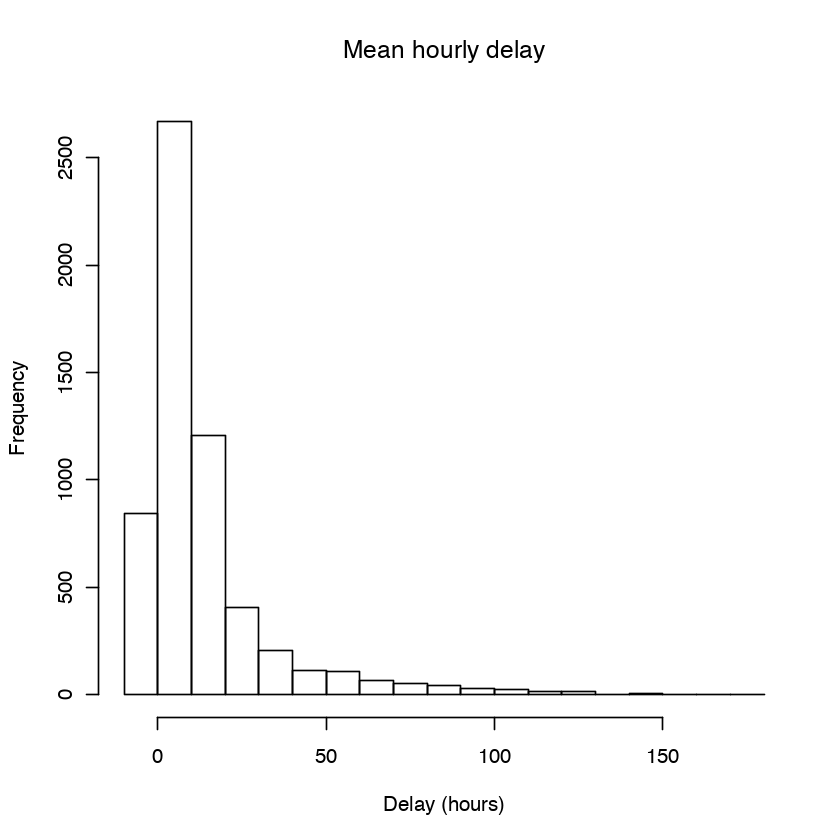

In [22]:
hist(delays$delay, main="Mean hourly delay", xlab="Delay (hours)")

# Random Variables and Distributions

## Random Variables

- **A random variable**: any characteristic that can be measured or categorized, and where any particular outcome is determined at least partially by chance.

> - Examples:
    - number of new diabetes cases in NYC in a given year
    - The weight of a randomly selected individual in NYC

> - Types:
    - Categorical random variable (e.g. disease / healthy)
    - Discrete random variable (e.g. sequence read counts)
    - Continuous random variable (e.g. normalized qPCR intensity)

## Probability Distributions

 - We use probability distributions to describe the probability of all possible realizations of a random variable
 - In public health we use probability distributions to describe hypotheses or inference about the _population_
    - because we normally cannot observe the entire population
- In practice we study a _sample_ selected from the population

<center>
<img src="http://blogs.oregonstate.edu/programevaluation/files/2014/04/ramdom-sample.jpg" alt="Random Sample" align="middle" style="width: 300px;"/>
</center>

## Random Variables - examples

Normally distributed random variable with mean $\mu = 0$ / standard deviation $\sigma = 1$, and a sample of $n=100$

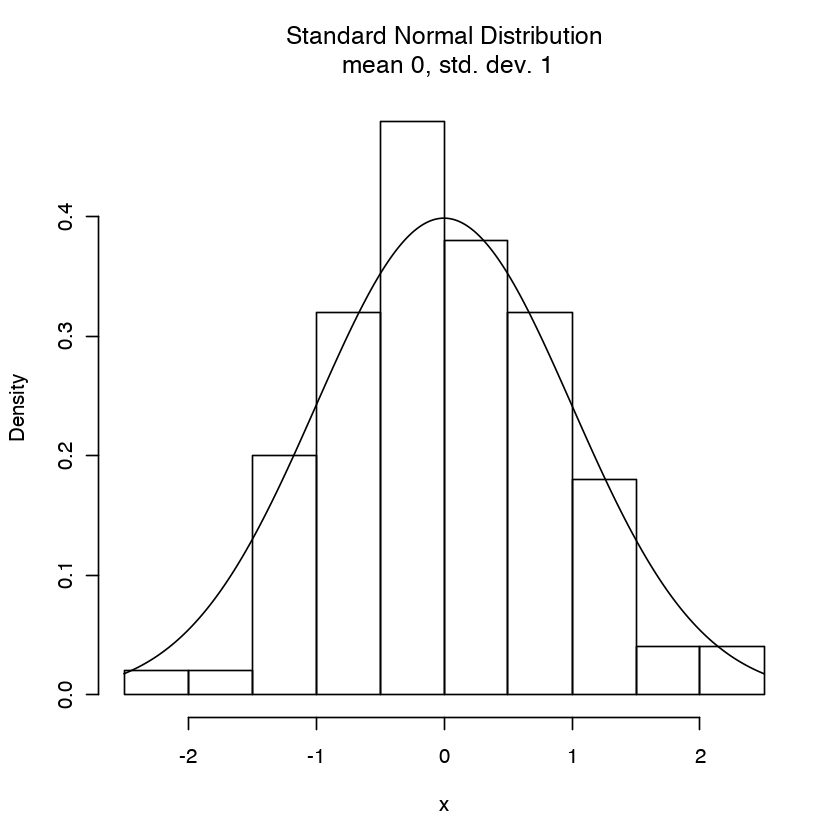

In [23]:
x=rnorm(100)
res=hist(x, main="Standard Normal Distribution\n mean 0, std. dev. 1", prob=TRUE)
xdens = seq(min(res$breaks), max(res$breaks), by=0.01)
lines(xdens, dnorm(xdens))

## Random Variables - examples

Poisson distributed random variable ($\lambda = 2$), and a sample of $n=100$.

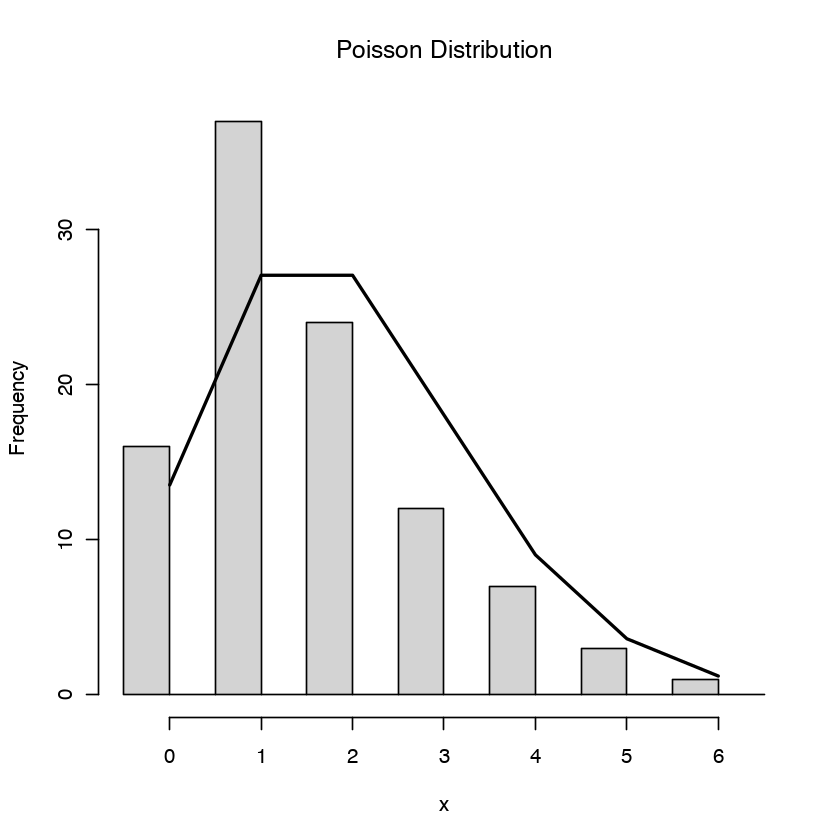

In [24]:
x=rpois(100, lambda=2)
res=hist(x, main="Poisson Distribution", prob=FALSE, col="lightgrey",
     breaks=seq(-0.5, round(max(x))+0.5, by=0.5))
xdens = seq(min(x), max(x), by=1)
lines(xdens, length(x) * dpois(xdens, lambda=2), lw=2)

## Random Variables - examples

Negative Binomially distributed random variable ($size=30, \mu=2$), and a sample of $n=100$.

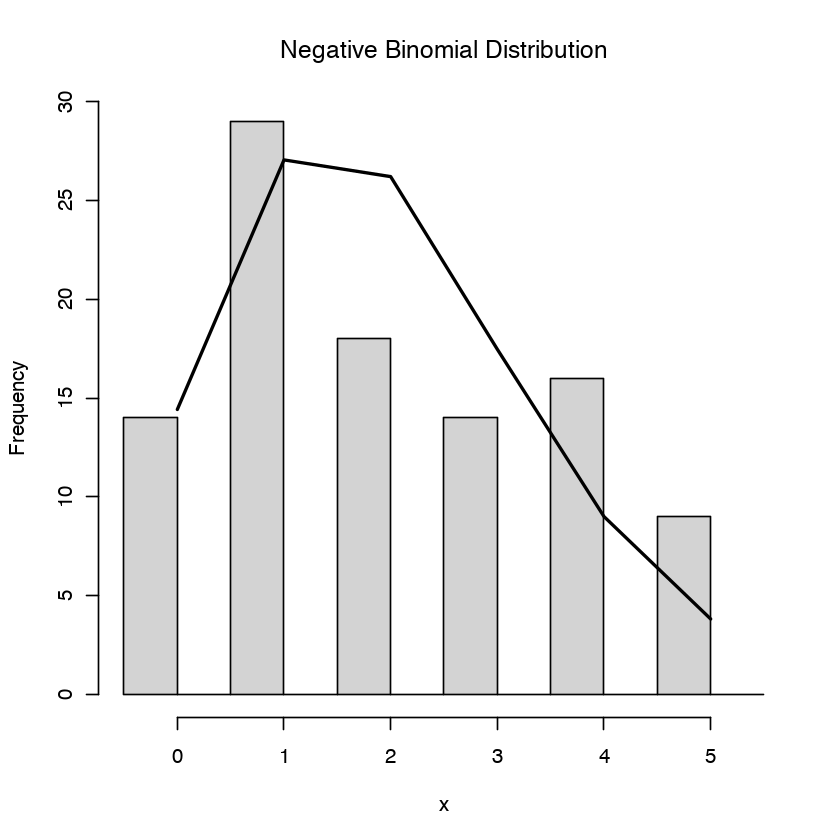

In [25]:
x=rnbinom(100, size=30, mu=2)
res=hist(x, main="Negative Binomial Distribution", prob=FALSE, col="lightgrey",
     breaks=seq(-0.5, round(max(x))+0.5, by=0.5))
xdens = seq(min(x), max(x), by=1)
lines(xdens, length(x) * dnbinom(xdens, size=30, mu=2), lw=2)

## Random Variables - examples

- Binomial Distribution random variable ($size=20, prob=0.25$), and a sample of $n=100$.
    - use for binary outcomes

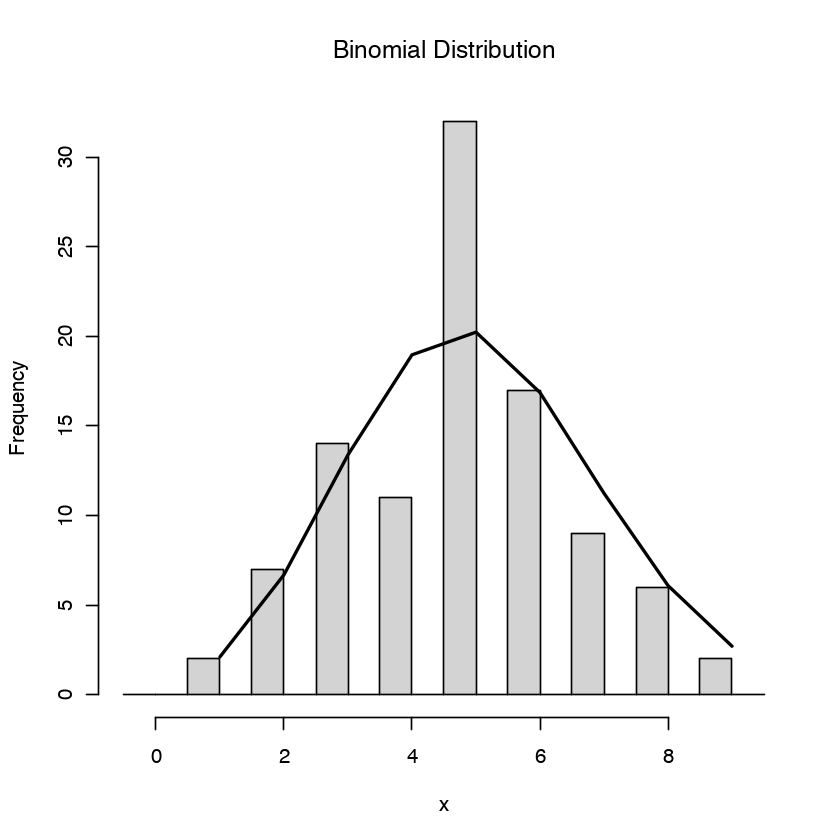

In [26]:
x=rbinom(100, size=20, prob=0.25)
res=hist(x, main="Binomial Distribution", prob=FALSE, col="lightgrey",
     breaks=seq(-0.5, round(max(x))+0.5, by=0.5))
xdens = seq(min(x), max(x), by=1)
lines(xdens, length(x) * dbinom(xdens, size=20, prob=0.25), lw=2)

# Hypothesis Testing

## Population vs sampling distributions

- Population distributions
    + Each realization / point is an individual
    
- Sampling distributions
    + Each realization / point is a sample
    + distribution depends on sample size
    + large sample distributions are given by the Central Limit Theorem

- **Hypothesis testing is about sampling distributions**
    + Did my sample likely come from that distribution?

## Logic of hypothesis testing

**One Sample** - observations come from one of two population distributions:

1. usual distribution that has been true in the past
2. a potentially new distribution induced by an intervention or changing condition

**Two Sample** - two samples are drawn, either:

1. from a single population
2. from two different populations

## The t-tests

- In a one-sample test, only a single sample is drawn:
    - $H_0: \mu = \mu_0$
- In a two-sample test, two samples are drawn *independently*:
    - $H_0: \mu_1 = \mu_2$
- A paired test is one sample of paired measurements, e.g.:
    - individuals before and after treatment

## When to use t-tests

* $\frac{{}\bar{x} - \mu}{s}$ and $\frac{\bar{x_1} - \bar{x_2}}{s}$
are t-distributed *if*:
    - the standard deviation $s$ is estimated from the sample
    - the population values are normally distributed
    - the population values are slightly skewed but n > 15
    - the population values are quite skewed but n > 30

* Wilcoxon tests are an alternative for non-normal populations
    - e.g. rank data
    - data where ranks are more informative than means
    - *not* when many ranks are arbitrary
    

# Hypothesis testing for categorical variables

## Lady Tasting Tea

- The Lady in question claimed to be able to tell whether the tea or the milk was added first to a cup
- Fisher proposed to give her eight cups, four of each variety, in random order
    - the Lady is **fully informed** of the experimental method
    - $H_0$: the Lady has no ability to tell which was added first

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Nice_Cup_of_Tea.jpg/330px-Nice_Cup_of_Tea.jpg" alt="Lady tasting tea" align="middle" style="height: 200px;">
</center>

Source: https://en.wikipedia.org/wiki/Lady_tasting_tea

## Fisher's Exact Test

p-value is the probability of the observed number of successes, or more, under $H_0$

<table>
<caption>Tea-Tasting Distribution</caption>
<tr>
<th scope="col">Success count</th>
<th scope="col">Permutations of selection</th>
<th scope="col">Number of permutations</th>
</tr>
<tr>
<td>0</td>
<td>oooo</td>
<td>1 × 1 = 1</td>
</tr>
<tr>
<td>1</td>
<td>ooox, ooxo, oxoo, xooo</td>
<td>4 × 4 = 16</td>
</tr>
<tr>
<td>2</td>
<td>ooxx, oxox, oxxo, xoxo, xxoo, xoox</td>
<td>6 × 6 = 36</td>
</tr>
<tr>
<td>3</td>
<td>oxxx, xoxx, xxox, xxxo</td>
<td>4 × 4 = 16</td>
</tr>
<tr>
<td>4</td>
<td>xxxx</td>
<td>1 × 1 = 1</td>
</tr>
<tr>
<th colspan="2" scope="row">Total</th>
<td>70</td>
</tr>
</table>

What do you notice about all these combinations?

## Notes on Fisher's Exact Test

- Can also be applied to rxc tables
- Remember that the margins of the table are *fixed by design*
- Also referred to as the Hypergeometric Test
- Exact p-values are difficult (and unnecessary) for large samples
    - `fisher.test(x, y = NULL, etc, simulate.p.value = FALSE)`

## Notes on Fisher's Exact Test (cont'd)

- Has been applied (**with peril!**) to gene set analysis, e.g.:
    - 10 of my top 100 genes are annotated with the cytokinesis GO term
    - 465 of 21,000 human genes are annotated with the cytokinesis GO term
    - Are my top 100 genes enriched for cytokinesis process?
- Problems with this analysis:
    - Main problem: top-n genes tend to be correlated, so their selections are not independent trials
    - Secondary: does not match design for $H_0$
- Alternative: permutation test repeating all steps

## Chi-squared test

- Test of independence for rxc table (two categorical variables)
- Does not assume the margins are fixed by design
    - i.e., the number of cups of tea with milk poured first can be random, and the Lady doesn't know how many
    - more common in practice
    - classic genomics example is GWAS
- $H_0$: the two variables are independent
- $H_A$: there is an association between the variables

## Application to GWAS

* Interested in association between disease and some potential causative factor
* In a case-control study, the numbers of cases and controls are fixed, but the other variable is not
* In a prospective or longitudinal cohort study, neither the number of cases or the other variable are fixed

In [27]:
disease=factor(c(rep(0,180),rep(1,20),rep(0,40),rep(1,10)),
               labels=c("control","cases"))
genotype=factor(c(rep("AA/Aa",204),rep("aa",46)),
                levels=c("AA/Aa","aa"))
dat <- data.frame(disease, genotype)
dat <- dat[sample(nrow(dat)),] #shuffle them up 
summary(dat)

    disease     genotype  
 control:220   AA/Aa:204  
 cases  : 30   aa   : 46  

## Application to GWAS (cont'd)

In [28]:
table(disease, genotype)

         genotype
disease   AA/Aa  aa
  control   184  36
  cases      20  10

In [29]:
chisq.test(disease, genotype)


	Pearson's Chi-squared test with Yates' continuity correction

data:  disease and genotype
X-squared = 3.9963, df = 1, p-value = 0.0456


In [30]:
chisq.test(disease, genotype, simulate.p.value = TRUE)


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  disease and genotype
X-squared = 5.0634, df = NA, p-value = 0.04048


## Application to GWAS (cont'd)

Note that the result says nothing about *how* the departure from independence occurs

In [31]:
library(epitools)
epitools::oddsratio(genotype, disease, method="wald")$measure

,estimate,lower,upper
AA/Aa,1.000000,NA,NA
aa,2.555556,1.104441,5.913274


(the default is whichever level is first alphabetically!)

## Summary - two categorical variables

- Choice between Fisher's Exact Test and Chi-square test is determined by experimental design
- If any counts in the table are less than 5, can use `simulate.p.value=TRUE` to get a more accurate p-value from the chi-square test
- Both assume independent observations (important!!)
- In a GWAS, correction for multiple testing is required
- Can also use logistic regression for two categorical variables


## Power and type I and II error

| True state of nature | Result of test             |                                                 |
|----------------------|----------------------------|-------------------------------------------------|
|                      | **Reject $H_0$**                                      | **Fail to reject $H_0$**                                 |
| $H_0$ TRUE           | Type I error, probability = $\alpha$ | No error, probability = $1-\alpha$                     |
| $H_0$ FALSE          | No error, probability is called power = $1-\beta$    | Type II error, probability = $\beta$ (false negative) |

## Use and mis-use of the p-value

- The p-value is the probability of observing a sample statistic _as or more extreme_ as you did, _assuming that $H_0$ is true_
- The p-value is a **random variable**:
    - **don't** treat it as precise.
    - **don't** do silly things like try to interpret differences or ratios between p-values
    - **don't** lose track of test assumptions such as independence of observations
    - **do** use a moderate p-value cutoff, then use some effect size measure for ranking
- Small p-values are particularly:
    - variable under repeated sampling, and
    - sensitive to test assumptions

## Use and mis-use of the p-value (cont'd)

- If we fail to reject $H_0$, is the probability that $H_0$ is true equal to ($1-\alpha$)?  (Hint: NO NO NO!)
    - Failing to reject $H_0$ does not mean $H_0$ is true
    - "No evidence of difference $\neq$ evidence of no difference"
- Statistical significance vs. practical significance
    - As sample size increases, point estimates such as the mean are more precise
    - With large sample size, small differences in means may be statistically significant but not practically significant
- Although $\alpha = 0.05$ is a common cut-off for the p-value, there is no set border between "significant" and "insignificant," only increasingly strong evidence against $H_0$ (in favor of $H_A$) as the p-value gets smaller.

# Lab Exercises

1. [dplyr exercises](http://genomicsclass.github.io/book/pages/dplyr_intro_exercises.html)
2. [random variables exercises](http://genomicsclass.github.io/book/pages/random_variables_exercises.html)